11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 32s 70ms/step - accuracy: 0.8436 - loss: 0.5546 - val_accuracy: 0.9763 - val_loss: 0.0939
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.9694 - loss: 0.1040 - val_accuracy: 0.9828 - val_loss: 0.0650
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9820 - loss: 0.0624 - val_accuracy: 0.9827 - val_loss: 0.0603
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9860 - loss: 0.0483 - val_accuracy: 0.9872 - val_loss: 0.0510
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.9895 - loss: 0.0353 - val_accuracy: 0.9872 - val_loss: 0.0456
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.9916 - loss: 0.0284 - val_accuracy: 0.9883 - val_loss: 0.0455
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 69ms/step - accuracy: 0.9940 - loss: 0.0213 - val_accuracy: 0.9865 - val_loss: 0.0487
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9946 - loss: 0.0193 - 

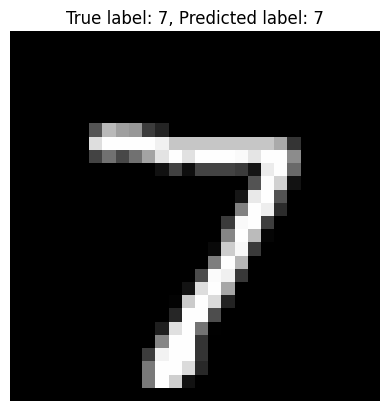

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Preprocess the data by reshaping it into a 4D tensor
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# Build the model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,
28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



# Predict the class of an image
predictions = model.predict(x_test[:1])
# Get the class with the highest probability
predicted_label = np.argmax(predictions[0])
# Plot the image and its predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("True label: %d, Predicted label: %d" % (np.argmax(y_test[0]), predicted_label))
plt.axis('off')
plt.show()